<a href="https://colab.research.google.com/github/Shad38/CVPR-assignment/blob/main/MID/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import random
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/animal_dataset/animal_dataset'
categories = os.listdir(data_path)
categories = [c for c in categories if not c.startswith('.')]
print(categories)

['dog', 'panda', 'cat']


In [4]:
label_map = {categories[i]: i for i in range(len(categories))}
print("Label Mapping:", label_map)


Label Mapping: {'dog': 0, 'panda': 1, 'cat': 2}


In [5]:
records = []

for category in tqdm(categories, desc='Loading Images: '):
    path = os.path.join(data_path, category)
    class_num = label_map[category]

    for fname in os.listdir(path):
        img_path = os.path.join(path, fname)

        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Skipping corrupted file: {img_path}")
                continue

            img = cv2.resize(img, (32, 32))
            img = img / 255.0

            records.append((img, class_num))

        except Exception as e:
            print(f"Error loading {img_path}: {e}")
            continue

print("\nTotal Images:", len(records))

Loading Images: 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]


Total Images: 300


In [6]:
random.shuffle(records)

X = []
Y = []

for img, cls in records:
    X.append(img)
    Y.append(cls)

X = np.array(X).reshape(-1, 32, 32, 1)
Y = np.array(Y)

trainSize = int(0.7 * len(X))
validSize = int(0.15 * len(X))

xTrain = X[:trainSize]
yTrain = Y[:trainSize]

xValid = X[trainSize: trainSize + validSize]
yValid = Y[trainSize: trainSize + validSize]

xTest = X[trainSize + validSize:]
yTest = Y[trainSize + validSize:]

print("Train:", xTrain.shape)
print("Valid:", xValid.shape)
print("Test:", xTest.shape)

Train: (210, 32, 32, 1)
Valid: (45, 32, 32, 1)
Test: (45, 32, 32, 1)


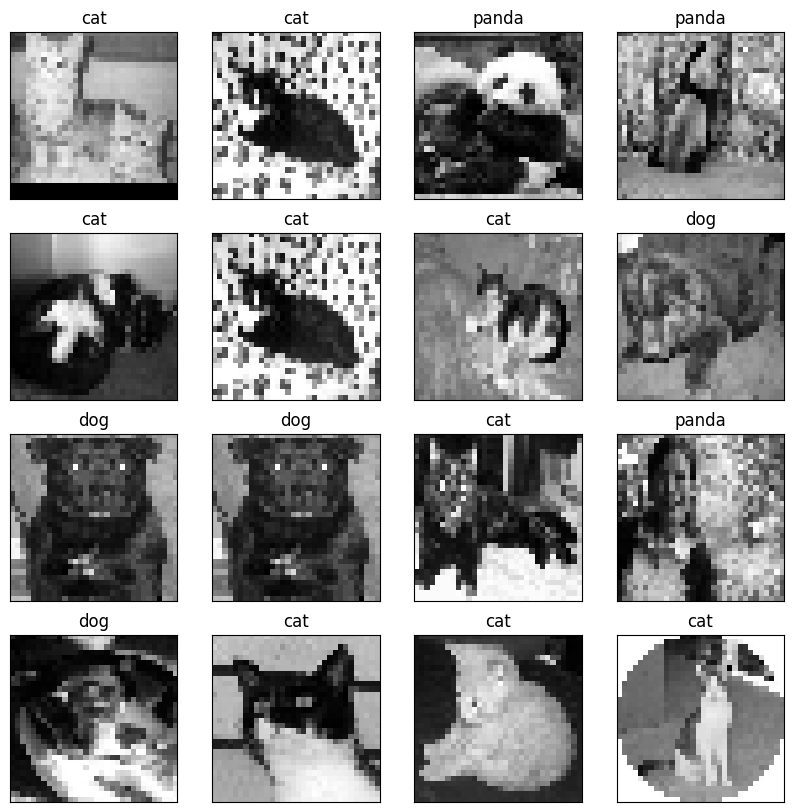

In [7]:
plt.figure(figsize=(10,10))
for i in range(16):
    index = random.randint(0, len(xTrain)-1)
    plt.subplot(4,4,i+1)
    plt.imshow(xTrain[index].reshape(32,32), cmap='gray')
    classNumber = yTrain[index]
    className = [k for k,v in label_map.items() if v == classNumber][0]
    plt.title(className)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
xTrainFlat = xTrain.reshape(len(xTrain), -1)
xTestFlat  = xTest.reshape(len(xTest), -1)


In [9]:
def l1(x1, x2):
    return np.sum(np.abs(x1 - x2))

def l2(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [10]:
def knnPredict(xTrain, yTrain, xTest, k = 5, distance_metric = "L2"):
    distances = []

    for i in range(len(xTrain)):
        if distance_metric == "L1":
            dist = l1(xTrain[i], xTest)
        else:
            dist = l2(xTrain[i], xTest)

        distances.append((dist, yTrain[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = [distances[i][1] for i in range(k)]
    return max(set(neighbors), key=neighbors.count)

In [11]:
def fiveFoldCrossValidation(X, y, k_values=[1,3,5,7], distance="L2"):
    foldSize = len(X) // 5
    results = {k: [] for k in k_values}

    for fold in range(5):
        start = fold * foldSize
        end = start + foldSize

        xValue = X[start:end]
        yValue = Y[start:end]

        xTrainFold = np.concatenate((X[:start], X[end:]))
        yTrainFold = np.concatenate((Y[:start], Y[end:]))

        print(f"\nFold {fold+1} — Distance: {distance}")

        for k in kValues:
            correct = 0
            for i in range(len(xValue)):
                pred = knnPredict(xTrainFold, yTrainFold, xValue[i], k, distance)
                if pred == yValue[i]:
                    correct += 1

            acc = correct / len(xValue)
            results[k].append(acc)
            print(f"K={k} Accuracy: {acc*100:.2f}%")

    return results



Fold 1 — Distance: L2
K=1 Accuracy: 47.62%
K=3 Accuracy: 47.62%
K=5 Accuracy: 45.24%
K=7 Accuracy: 50.00%

Fold 2 — Distance: L2
K=1 Accuracy: 52.38%
K=3 Accuracy: 42.86%
K=5 Accuracy: 45.24%
K=7 Accuracy: 45.24%

Fold 3 — Distance: L2
K=1 Accuracy: 35.71%
K=3 Accuracy: 33.33%
K=5 Accuracy: 38.10%
K=7 Accuracy: 38.10%

Fold 4 — Distance: L2
K=1 Accuracy: 30.95%
K=3 Accuracy: 28.57%
K=5 Accuracy: 33.33%
K=7 Accuracy: 38.10%

Fold 5 — Distance: L2
K=1 Accuracy: 38.10%
K=3 Accuracy: 28.57%
K=5 Accuracy: 38.10%
K=7 Accuracy: 38.10%

Fold 1 — Distance: L1
K=1 Accuracy: 50.00%
K=3 Accuracy: 45.24%
K=5 Accuracy: 50.00%
K=7 Accuracy: 59.52%

Fold 2 — Distance: L1
K=1 Accuracy: 52.38%
K=3 Accuracy: 47.62%
K=5 Accuracy: 57.14%
K=7 Accuracy: 47.62%

Fold 3 — Distance: L1
K=1 Accuracy: 42.86%
K=3 Accuracy: 38.10%
K=5 Accuracy: 35.71%
K=7 Accuracy: 35.71%

Fold 4 — Distance: L1
K=1 Accuracy: 33.33%
K=3 Accuracy: 33.33%
K=5 Accuracy: 35.71%
K=7 Accuracy: 38.10%

Fold 5 — Distance: L1
K=1 Accuracy: 

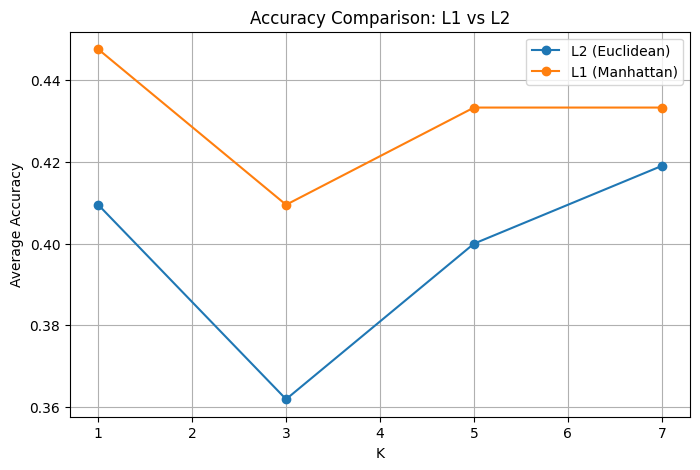

In [12]:
kValues = [1,3,5,7]

l2Results = fiveFoldCrossValidation(xTrainFlat, yTrain, kValues, distance="L2")
l1Results = fiveFoldCrossValidation(xTrainFlat, yTrain, kValues, distance="L1")

averageL2 = [np.mean(l2Results[k]) for k in kValues]
averageL1 = [np.mean(l1Results[k]) for k in kValues]

plt.figure(figsize=(8,5))
plt.plot(kValues, averageL2, marker='o', label="L2 (Euclidean)")
plt.plot(kValues, averageL1, marker='o', label="L1 (Manhattan)")
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.title("Accuracy Comparison: L1 vs L2")
plt.grid(True)
plt.legend()
plt.show()


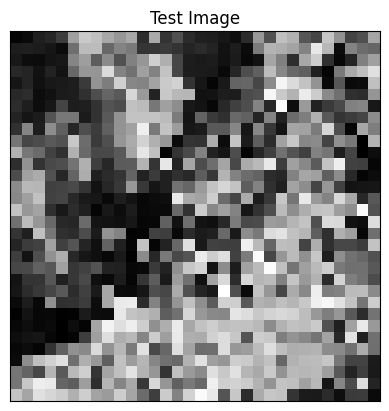

Top-5 Predicted Classes:
1. dog
2. cat
3. cat
4. dog
5. cat


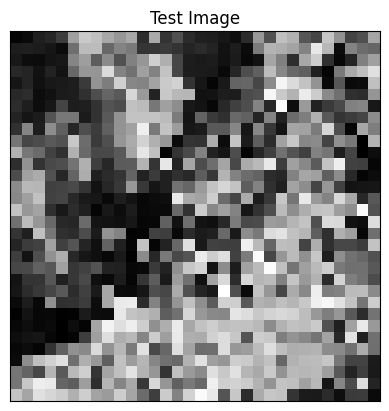

Top-5 Predicted Classes:
1. dog
2. cat
3. cat
4. dog
5. cat


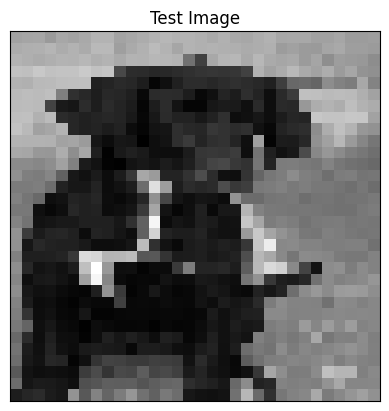

Top-5 Predicted Classes:
1. cat
2. cat
3. panda
4. dog
5. cat


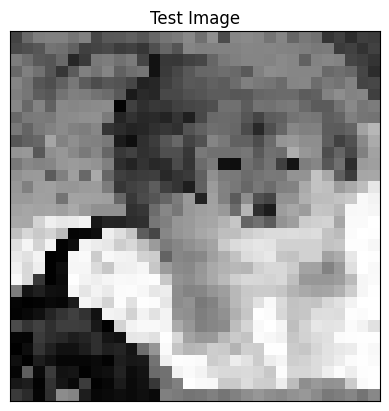

Top-5 Predicted Classes:
1. cat
2. dog
3. cat
4. dog
5. cat


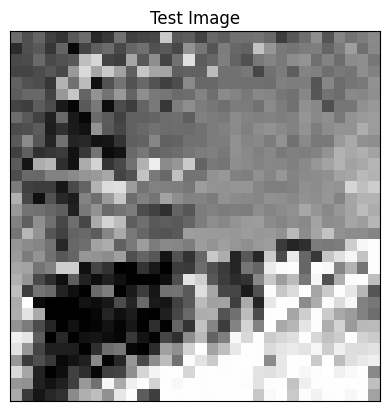

Top-5 Predicted Classes:
1. cat
2. dog
3. cat
4. cat
5. cat


In [13]:
def top5Predictions(index):
    distances = []
    for i in range(len(xTrainFlat)):
        dist = l2(xTestFlat[index], xTrainFlat[i])
        distances.append((dist, yTrain[i]))

    distances.sort(key=lambda x: x[0])
    top5 = distances[:5]
    return [y for d, y in top5]

for i in range(5):
    index = random.randint(0, len(xTestFlat) - 1)

    plt.imshow(xTest[index].reshape(32,32), cmap='gray')
    plt.title("Test Image")
    plt.xticks([])
    plt.yticks([])
    plt.show()

    preds = top5Predictions(index)
    print("Top-5 Predicted Classes:")
    for rank, p in enumerate(preds):
        print(f"{rank+1}. {list(label_map.keys())[list(label_map.values()).index(p)]}")